In [1]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

import sys 
sys.path.append('../../src')

In [3]:
from spaceoracle.plotting.cartography import Cartography


2025-05-18 14:19:11.693157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/crc/install/gcc-12.2.0/fftw/3.3.10/lib:/ihome/crc/install/gcc-12.2.0/glpk/5.0/lib:/ihome/crc/install/gcc-12.2.0/proj/4.9.3/lib:/ihome/crc/install/gcc-12.2.0/gdal/2.4.4/lib:/ihome/crc/install/gcc-12.2.0/netcdf/4.8.1/lib:/ihome/crc/install/gcc-12.2.0/hdf5/1.14.0/lib:/ihome/crc/install/gcc-12.2.0/jags/4.3.2/lib:/ihome/crc/install/gcc-12.2.0/gsl/2.7.1/lib:/ihome/c

In [4]:
ref_adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_kidney_13.h5ad')
test_adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_kidney_14.h5ad')

ref_models_dir = '/ix/djishnu/shared/djishnu_kor11/lasso_runs/mouse_kidney_13'

In [5]:
matching = pd.read_csv('matching_slat_banksy.csv', index_col=0)

In [6]:
from spaceoracle.visionary import Visionary

import warnings
warnings.simplefilter("ignore", category=UserWarning)

renata = Visionary(
    ref_adata = ref_adata,
    test_adata = test_adata,
    ref_json_path = f'{ref_models_dir}/run_params.json',
    subsample=1,
    matching_annot='cell_type',
    prematching=matching
)


In [7]:
banksy_df = pd.read_csv('banksy_mouse_kidney_14.csv', index_col=0)

### Perturbation

In [8]:
adata = renata.adata
gf = renata

In [9]:
mif_df = pd.read_parquet('/ix/djishnu/shared/djishnu_kor11/genome_screens/mouse_kidney_14/Mif_4n_0x.parquet')
adata = test_adata

adata.layers['Mif'] = mif_df.values

In [10]:
target_gene = 'Mif'

In [11]:
# adata.obsm['X_umap'] = banksy_df.reindex(adata.obs.index, axis=0)[['x_umap', 'y_umap']].values
adata.obs['banksy_cluster'] = banksy_df['banksy_cluster']

### Spatial beta

In [12]:
# def get_relevant_genes(target_gene, gf, adata):
#     # betadata = gf.load_betadata(gene=target_gene, save_dir=gf.save_dir)
#     xy = pd.DataFrame(adata.obsm['spatial'], columns=['x', 'y'], index=adata.obs_names)
#     df = xy.join(adata.obs).join(adata.to_df(layer='imputed_count'))
#     df = df[df.x > 500]
#     splat = gf.splash_betas(target_gene)
#     # bdf = splat.join(xy).join(adata.obs)
#     out = splat.mean().sort_values(ascending=False, key=abs).head(20).to_frame()
#     out.columns = [target_gene]
#     return out

In [13]:
# xy = pd.DataFrame(adata.obsm['spatial'], columns=['x', 'y'], index=adata.obs_names)
# df = xy.join(adata.obs).join(adata.to_df(layer='imputed_count'))

# splat = gf.splash_betas(target_gene)
# bdf = splat.join(xy).join(adata.obs)

# df_ = bdf[bdf['ct3'].isin(['Mac_0', 'Mac_2'])]

# top_betas = splat.mean().sort_values(ascending=False, key=abs).head(12)
# top_betas

In [14]:
# sample = 'mouse_kidney_14'
# ref_order = [
#     'beta_Tfcp2l1', 'beta_Mbd1', 'beta_Gata3', 'beta_Pax2', 'beta_Sp4', 'beta_Id4', 
#     'beta_Sim2', 'beta_Klf5', 'beta_Tead1', 'beta_Jdp2', 'beta_Bhlhe40', 'beta_Sim1'
# ]

# cbar_range = {
#     'beta_Tfcp2l1': (0.3, 0.58),
#     'beta_Mbd1': (0.26, 0.41),
#     'beta_Gata3': (0.09, 0.31),
#     'beta_Pax2': (0.27, 0.33),
#     'beta_Sp4': (-0.57, -0.25),
#     'beta_Id4': (-0.23, -0.04),
#     'beta_Sim2': (0.05, 0.22),
#     'beta_Klf5': (-0.26, -0.05),
#     'beta_Tead1': (0.04, 0.32),
#     'beta_Jdp2': (-0.11, -0.05),
#     'beta_Bhlhe40': (0.13, 0.23),
#     'beta_Sim1': (0.01, 0.3),
# }

# fig, axes = plt.subplots(4, 3, figsize=(25, 19), dpi=200)
# axes = axes.flatten()

# for i, target in enumerate(ref_order):
#     ax = axes[i]
    
#     ax.scatter(
#         df['x'], df['y'],
#         c='grey',
#         alpha=0.3,
#         s=20, marker='o',
#         cmap='rainbow',
#         linewidth=0.0, edgecolor='black'
#     )

#     markers = {'Mac_0': 'X', 'Mac_2': 'o'}
#     for cell_type in markers:
#         mask = df_['ct3'] == cell_type
#         scatter = ax.scatter(
#             df_[mask]['x'], df_[mask]['y'],
#             c=df_[mask][target],
#             s=40, marker=markers[cell_type],
#             cmap='rainbow', linewidth=0.35, edgecolor='black',
#             vmin=cbar_range[target][0], vmax=cbar_range[target][1]
#         )
    
#     ax.set_axis_off()
#     cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
#     # cbar.set_label(target, fontsize=12)
#     ax.set_title(f'{target.replace("beta_", "")}', fontsize=20)

# plt.suptitle(f'{sample} Beta Coefficients for {target_gene}\n\n', fontsize=30)
# plt.tight_layout()
# plt.show()

In [15]:
# top_betas

### Transitions

In [16]:
adata = test_adata

In [17]:
banksy_df = pd.read_csv('banksy_mouse_kidney_14.csv', index_col=0)
adata.obs['banksy_cluster'] = banksy_df['banksy_cluster']
# adata.obsm['X_umap'] = banksy_df.reindex(adata.obs.index, axis=0)[['x_umap', 'y_umap']].values

In [18]:
colors =["#6f6ec7",
    "#59ba58",
    "#a45dcf",
    "#a2b343",
    "#c857a7",
    "#4e884c",
    "#d44064",
    "#50bca8",
    "#c65d3d",
    "#6b96d2",
    "#d49a46",
    "#bd6c8a",
    "#817531"
]
color_dict = {i: color for i, color in zip(adata.obs['banksy_cluster'].unique(), colors)}

In [19]:
colors = ["#9ac54f",
"#8146b8",
"#87b997",
"#c45183",
"#4c3c3a",
"#c46f41",
"#8d93c1"]

color_dict = {
    ct: color for ct, color in zip(adata.obs['cell_type'].unique(), colors)
}

In [20]:
# chart = Cartography(adata, color_dict)

In [21]:
# sample = 'mouse_kidney_14'
# cluster_label = 'cell_type'

# kotarget = 'Mif'
# ax = chart.plot_umap_quiver(
#     # perturbed_df=gex_df,
#     perturb_target=kotarget,
#     grid_scale=1,
#     vector_scale=0.8,
#     figsize=(5, 5), 
#     hue=cluster_label,
#     alpha=0.5,
#     scatter_size=10,
#     betadata_path=f'/ix/djishnu/shared/djishnu_kor11/genome_screens/{sample}',
#     legend_on_loc=False,
# )
# ax.legend(
#     bbox_to_anchor=(0.5, 0.0),
#     loc='upper center', ncol=3, 
#     frameon=False, markerscale=1.5,
#     fontsize=6
# )


# # Add cluster labels on top of points
# for cluster in adata.obs[cluster_label].unique():
#     mask = adata.obs[cluster_label] == cluster
#     x = adata.obsm['X_umap'][mask, 0].mean()
#     y = adata.obsm['X_umap'][mask, 1].mean()
#     ax.text(x, y, str(cluster),
#             horizontalalignment='center',
#             verticalalignment='center',
#             fontsize=8,
#             bbox=dict(facecolor='gray', alpha=0.2, edgecolor='none'))

# plt.title(f'{sample} {kotarget} KO')
# plt.show()

In [22]:
adata = test_adata
adata_ = adata[adata.obs['ct3'].str.contains('Mac')]

In [23]:
sc.pp.pca(adata_, layer='normalized_count')
sc.pp.neighbors(adata_, use_rep='X_pca')

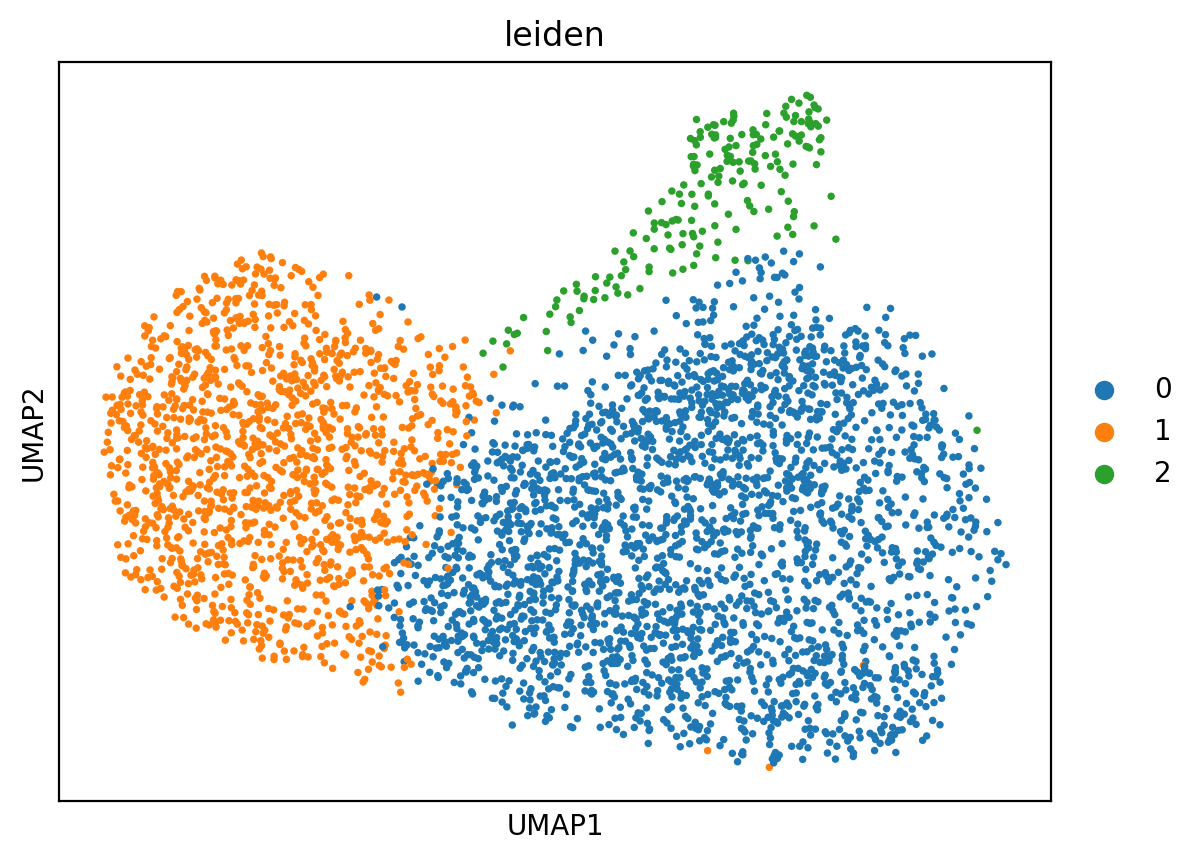

In [24]:
sc.tl.umap(adata_, min_dist=0.5, spread=1)
sc.tl.leiden(adata_, key_added='leiden', resolution=0.2)
sc.pl.umap(adata_, color='leiden')

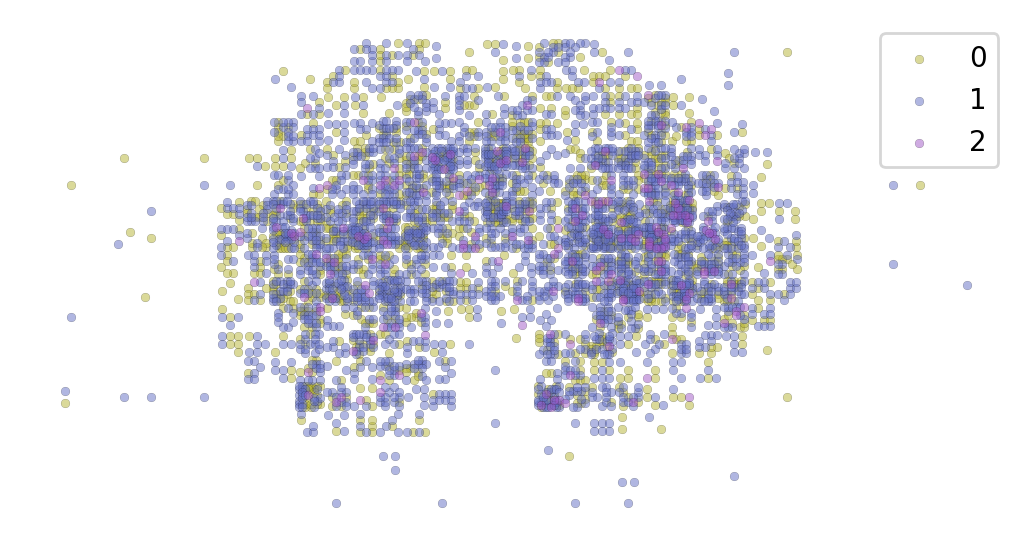

In [55]:
# color_dict = {i: color for i, color in zip(['1', '0', '2'], colors)}
color_dict = {'1': '#626fc5',
 '0': '#b6b434',
 '2': '#a058c7',
 '3': '#5bb84d',
 '4': '#d050a6'}

# flip 0 and 1 
adata_.obs['leiden_orig'] = adata_.obs['leiden'].copy()
adata_.obs['leiden'] = adata_.obs['leiden'].map({'0': '1', '1': '0', '2': '2'})

for ct in adata_.obs['leiden'].unique():
    mask = adata_.obs['leiden'] == ct
    plt.scatter(
        adata_.obsm['spatial'][mask, 0], adata_.obsm['spatial'][mask, 1],
        c=color_dict[ct], s=10, alpha=0.5, label=ct,
        edgecolor='black', linewidth=0.1
    )

plt.gca().set_axis_off()
plt.gca().set_aspect('equal')
plt.legend()

plt.show()

In [56]:
chart_ = Cartography(adata_, color_dict)

In [57]:
marker_dict = {
    'osmogenes': ['Aqp2', 'Aqp4', 'Cryab', 'Elf5', 'Mal', 'Muc1',
        'Pax2', 'Sgk1', 'Slc14a2', 'Slc5a3'],
    'Mac': ['Itgam', 'Adgre1'],
    'M1-like': ["Tnf", 'Ccl2', 'Cd86', 'Cd80', 'Il1r1', 'Il1r2'],
    'M2-like': ['Arg1', 'Mrc1', 'Msr1', 'Fcer2a']
}

marker_dict = {k: [x for x in v if x in adata.var_names] for k,v in marker_dict.items()}
sc.pl.dotplot(
    # ref_adata[ref_adata.obs['ct3'].isin(['Mac_0', 'Mac_2'])], 
    # adata[adata.obs['ct3'].str.contains('Mac')],
    adata_,
    marker_dict,
    # layer='imputed_count', 
    layer='normalized_count',  
    # groupby='banksy_cluster',
    # groupby='ct3',
    groupby='leiden',
    dendrogram=False,
    standard_scale='var',
    figsize=(10, 4),  # Increased height to accommodate title
    # title='Macrophage Markers in mouse_kidney_13',
)


ValueError: adata.obs contains duplicated columns. Please rename or remove these columns first.
`Duplicated columns ['transition']

In [58]:
# sample = 'mouse_kidney_14'
# kotarget = 'Mif'
# ax = chart_.plot_umap_quiver(
#     perturb_target=kotarget,
#     grid_scale=1,
#     vector_scale=0.5,
#     figsize=(3, 3), 
#     hue='leiden',
#     # hue='ct3', 
#     # hue='banksy_cluster', 
#     alpha=0.5,
#     scatter_size=10,
#     betadata_path=f'/ix/djishnu/shared/djishnu_kor11/genome_screens/{sample}',
#     legend_on_loc=False,
# )
# ax.legend(
#     bbox_to_anchor=(0.5, 0.0),
#     loc='upper center', ncol=3, 
#     frameon=False, markerscale=1.5,
#     fontsize=6
# )

# plt.title(f'{kotarget} KO')
# plt.show()

In [59]:
chart_.adata.obs['leiden'].value_counts()

leiden
1    2623
0    1320
2     198
Name: count, dtype: int64

In [60]:
delta_X = (chart_.adata.to_df(layer='Mif') - chart_.unperturbed_expression).values
gene_mtx = chart_.unperturbed_expression.values
gene_mtx.shape, delta_X.shape

((4141, 3058), (4141, 3058))

In [61]:
# corr = chart_.compute_perturbation_corr(gene_mtx, delta_X)
# corr.shape

corr = chart_.compute_perturbation_corr(gene_mtx, delta_X)
corr.shape

(4141, 4141)

In [62]:
# source_ct = '1'
# transition_df = chart_.compute_transitions(corr, source_ct=source_ct, annot='leiden')
# range_df = chart_.assess_transitions(
#     transition_df, adata_.obs['leiden'], source_ct, 'leiden')

# range_df 

In [63]:
# source_ct = '0'

# transition_df = chart_.compute_transitions(corr, source_ct=source_ct, annot='leiden')
# chart_.assess_transitions(
#     transition_df, adata_.obs['leiden'], source_ct, 'leiden')

In [64]:
# print(f'source{source_ct} transitions')
# fates = chart_.get_cellfate(transition_df, 
#                     allowed_fates=adata_.obs['leiden'].unique(), thresh=0.0002, annot='leiden')

In [65]:
# from numba import jit

# # Cannibalized from CellOracle
# @jit(nopython=True)
# def permute_rows_nsign(A: np.ndarray) -> None:
#     """Permute in place the entries and randomly switch the sign for each row of a matrix independently.
#     """
#     plmi = np.array([+1, -1])
#     for i in range(A.shape[0]):
#         np.random.shuffle(A[i, :])
#         A[i, :] = A[i, :] * np.random.choice(plmi, size=A.shape[1])


In [66]:
# rand_corr = corr.copy()
# permute_rows_nsign(rand_corr)


# source_ct = '0'
# print(f'randomly permuted source {source_ct} transitions')
# transition_df = chart_.compute_transitions(rand_corr, source_ct=source_ct, annot='leiden')
# chart_.assess_transitions(
#     transition_df, adata_.obs['leiden'], source_ct, 'leiden')
# fates = chart_.get_cellfate(transition_df, 
#                     allowed_fates=adata_.obs['leiden'].unique(), thresh=0.0002, annot='leiden')
# print('\n')
# source_ct = '1'
# print(f'randomly permuted source{source_ct} transitions')
# transition_df = chart_.compute_transitions(rand_corr, source_ct=source_ct, annot='leiden')
# chart_.assess_transitions(
#     transition_df, adata_.obs['leiden'], source_ct, 'leiden')
# fates = chart_.get_cellfate(transition_df, 
#                     allowed_fates=adata_.obs['leiden'].unique(), thresh=0.0002, annot='leiden')


### Figure making

In [67]:
import alphashape
from matplotlib.legend_handler import HandlerTuple
import matplotlib
import seaborn as sns 
from shapely.geometry import Point

In [68]:
adata = adata_
chart = chart_


In [70]:
if 'transition' in chart.adata.obs.keys():
    del chart.adata.obs['transition']

In [71]:
chart.get_transition_annot(
    corr, 
    allowed_fates=chart.adata.obs['leiden'].unique(), 
    thresh=0, annot='leiden')

source ct 0 Counter({'0': 1320}) 0.00023957971828547314 0.0
source ct 1 Counter({'0': 2569, '1': 54}) 0.0003138507697533618 0.0
source ct 2 Counter({'0': 175, '2': 18, '1': 5}) 0.0002605312140345448 0.0


In [72]:
genes = ['Aqp2', 'Aqp4', 'Cryab', 'Elf5', 'Mal', 'Muc1',
        'Pax2', 'Sgk1', 'Slc14a2', 'Slc5a3',
        "Tnf", 'Ccl2', 'Cd86', 'Cd80', 'Il1r1', 'Il1r2',
        'Arg1', 'Mrc1', 'Msr1', 'Fcer2a']

df = adata[:,genes].to_df(layer='normalized_count')
df['leiden'] = adata.obs['leiden'].astype('category')
df.to_csv('figures/dfs/mouse_kidney_14_leiden_markers.csv')

In [73]:
# del adata.obs['x']
# del adata.obs['y']


In [74]:
xy = pd.DataFrame(adata.obsm['spatial'], index=adata.obs.index, columns=['x', 'y'])

In [75]:
ct_points_wt, ct_points_ko = chart.make_celltype_dict(annot='leiden')

ref_adata.obs['x'] = ref_adata.obsm['spatial'][:, 0]
ref_adata.obs['y'] = ref_adata.obsm['spatial'][:, 1]

In [76]:
alphashapes = {}
for l in chart.adata.obs['leiden'].unique():
    alphashapes[l] = alphashape.alphashape(ct_points_wt[l], alpha=0.03)

# alpha_shape_0 = alphashape.alphashape(ct_points_wt['0'], alpha=0.05)
# alpha_shape_1 = alphashape.alphashape(ct_points_wt['1'], alpha=0.03)
# alpha_shape_2 = alphashape.alphashape(ct_points_wt['2'], alpha=0.06)

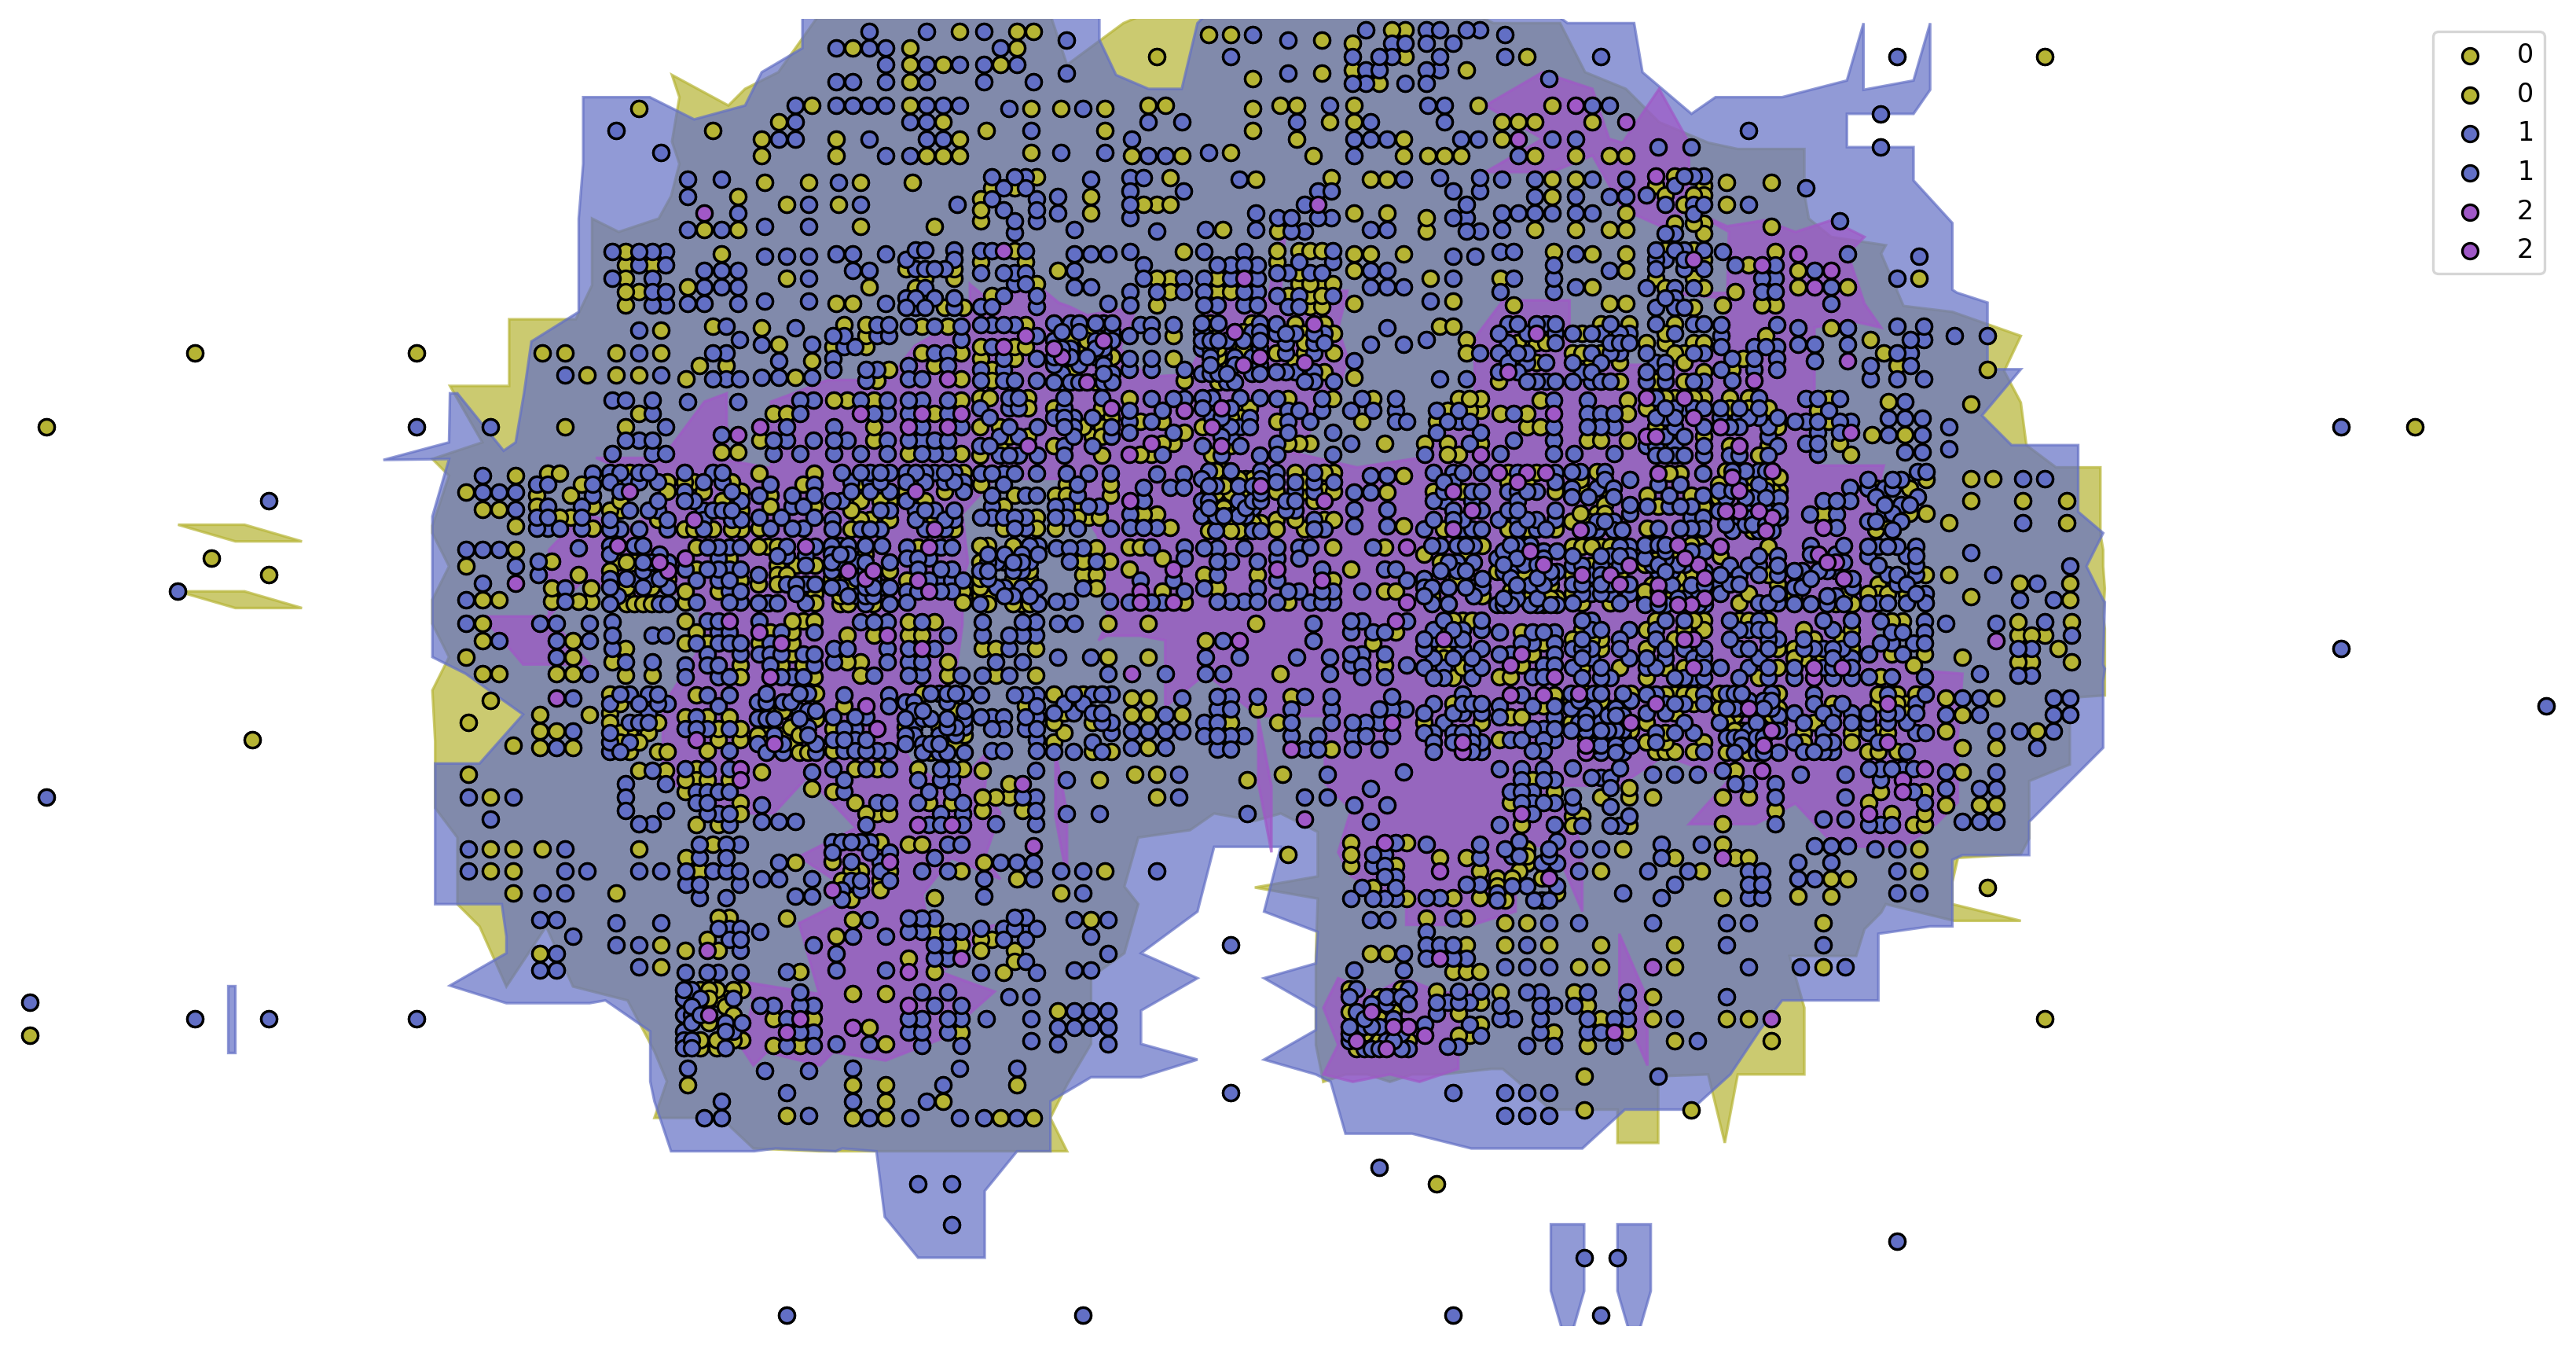

In [77]:
fig, ax = plt.subplots(figsize=(20, 9), dpi=120)
data = xy.join(adata.obs)

scatter = sns.scatterplot(
    data=xy.join(adata.obs),
    # data = test_adata.obs,
    x='x', y='y',
    # hue='banksy_celltypes', 
    color='grey',
    s=30,
    alpha=0.3,
    edgecolor='none',
    # palette=color_dict,
    ax=ax,
)

zone_alpha = 0.7
area_thresh = 10

for cluster, alpha_shape in alphashapes.items():
    try:
        for geom in alpha_shape.geoms:
            if geom.area > area_thresh:
                ax.fill(
                    geom.exterior.xy[0], 
                    geom.exterior.xy[1], 
                    color=color_dict[str(cluster)], alpha=zone_alpha)
    except:
        geom = alpha_shape
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict[str(cluster)], alpha=zone_alpha
        )

for ct in chart.adata.obs['leiden'].unique():
    ax.scatter(
        chart.adata[chart.adata.obs['leiden'] == ct].obsm['spatial'][:, 0],
        chart.adata[chart.adata.obs['leiden'] == ct].obsm['spatial'][:, 1],
        c=color_dict[ct], alpha=1, edgecolor='black', linewidth=1,
        label=ct
    )


for ct in chart.adata.obs['leiden'].unique():
    ax.scatter(
        chart.adata[chart.adata.obs['leiden'] == ct].obsm['spatial'][:, 0],
        chart.adata[chart.adata.obs['leiden'] == ct].obsm['spatial'][:, 1],
        c=color_dict[ct], alpha=1, edgecolor='black', linewidth=1, label=ct
    )

handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1]))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)
ax.legend(sorted_handles, sorted_labels)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_aspect('equal')
ax.set_xlim(data.x.min() - 10, data.x.max() + 10)
ax.set_ylim(data.y.min() - 10, data.y.max() + 10)

plt.savefig(f'figures/mouse_kidney_14_MifKO_preKO.svg', format='svg')

In [78]:
# alpha_shape_0 = alphashape.alphashape(ct_points_ko['0'], alpha=0.05)
# alpha_shape_1 = alphashape.alphashape(ct_points_ko['1'], alpha=0.03)
# alpha_shape_2 = alphashape.alphashape(ct_points_ko['2'], alpha=0.06)

alphashapes = {}
for l in chart.adata.obs['leiden'].unique():
    alphashapes[l] = alphashape.alphashape(ct_points_ko[l], alpha=0.03)


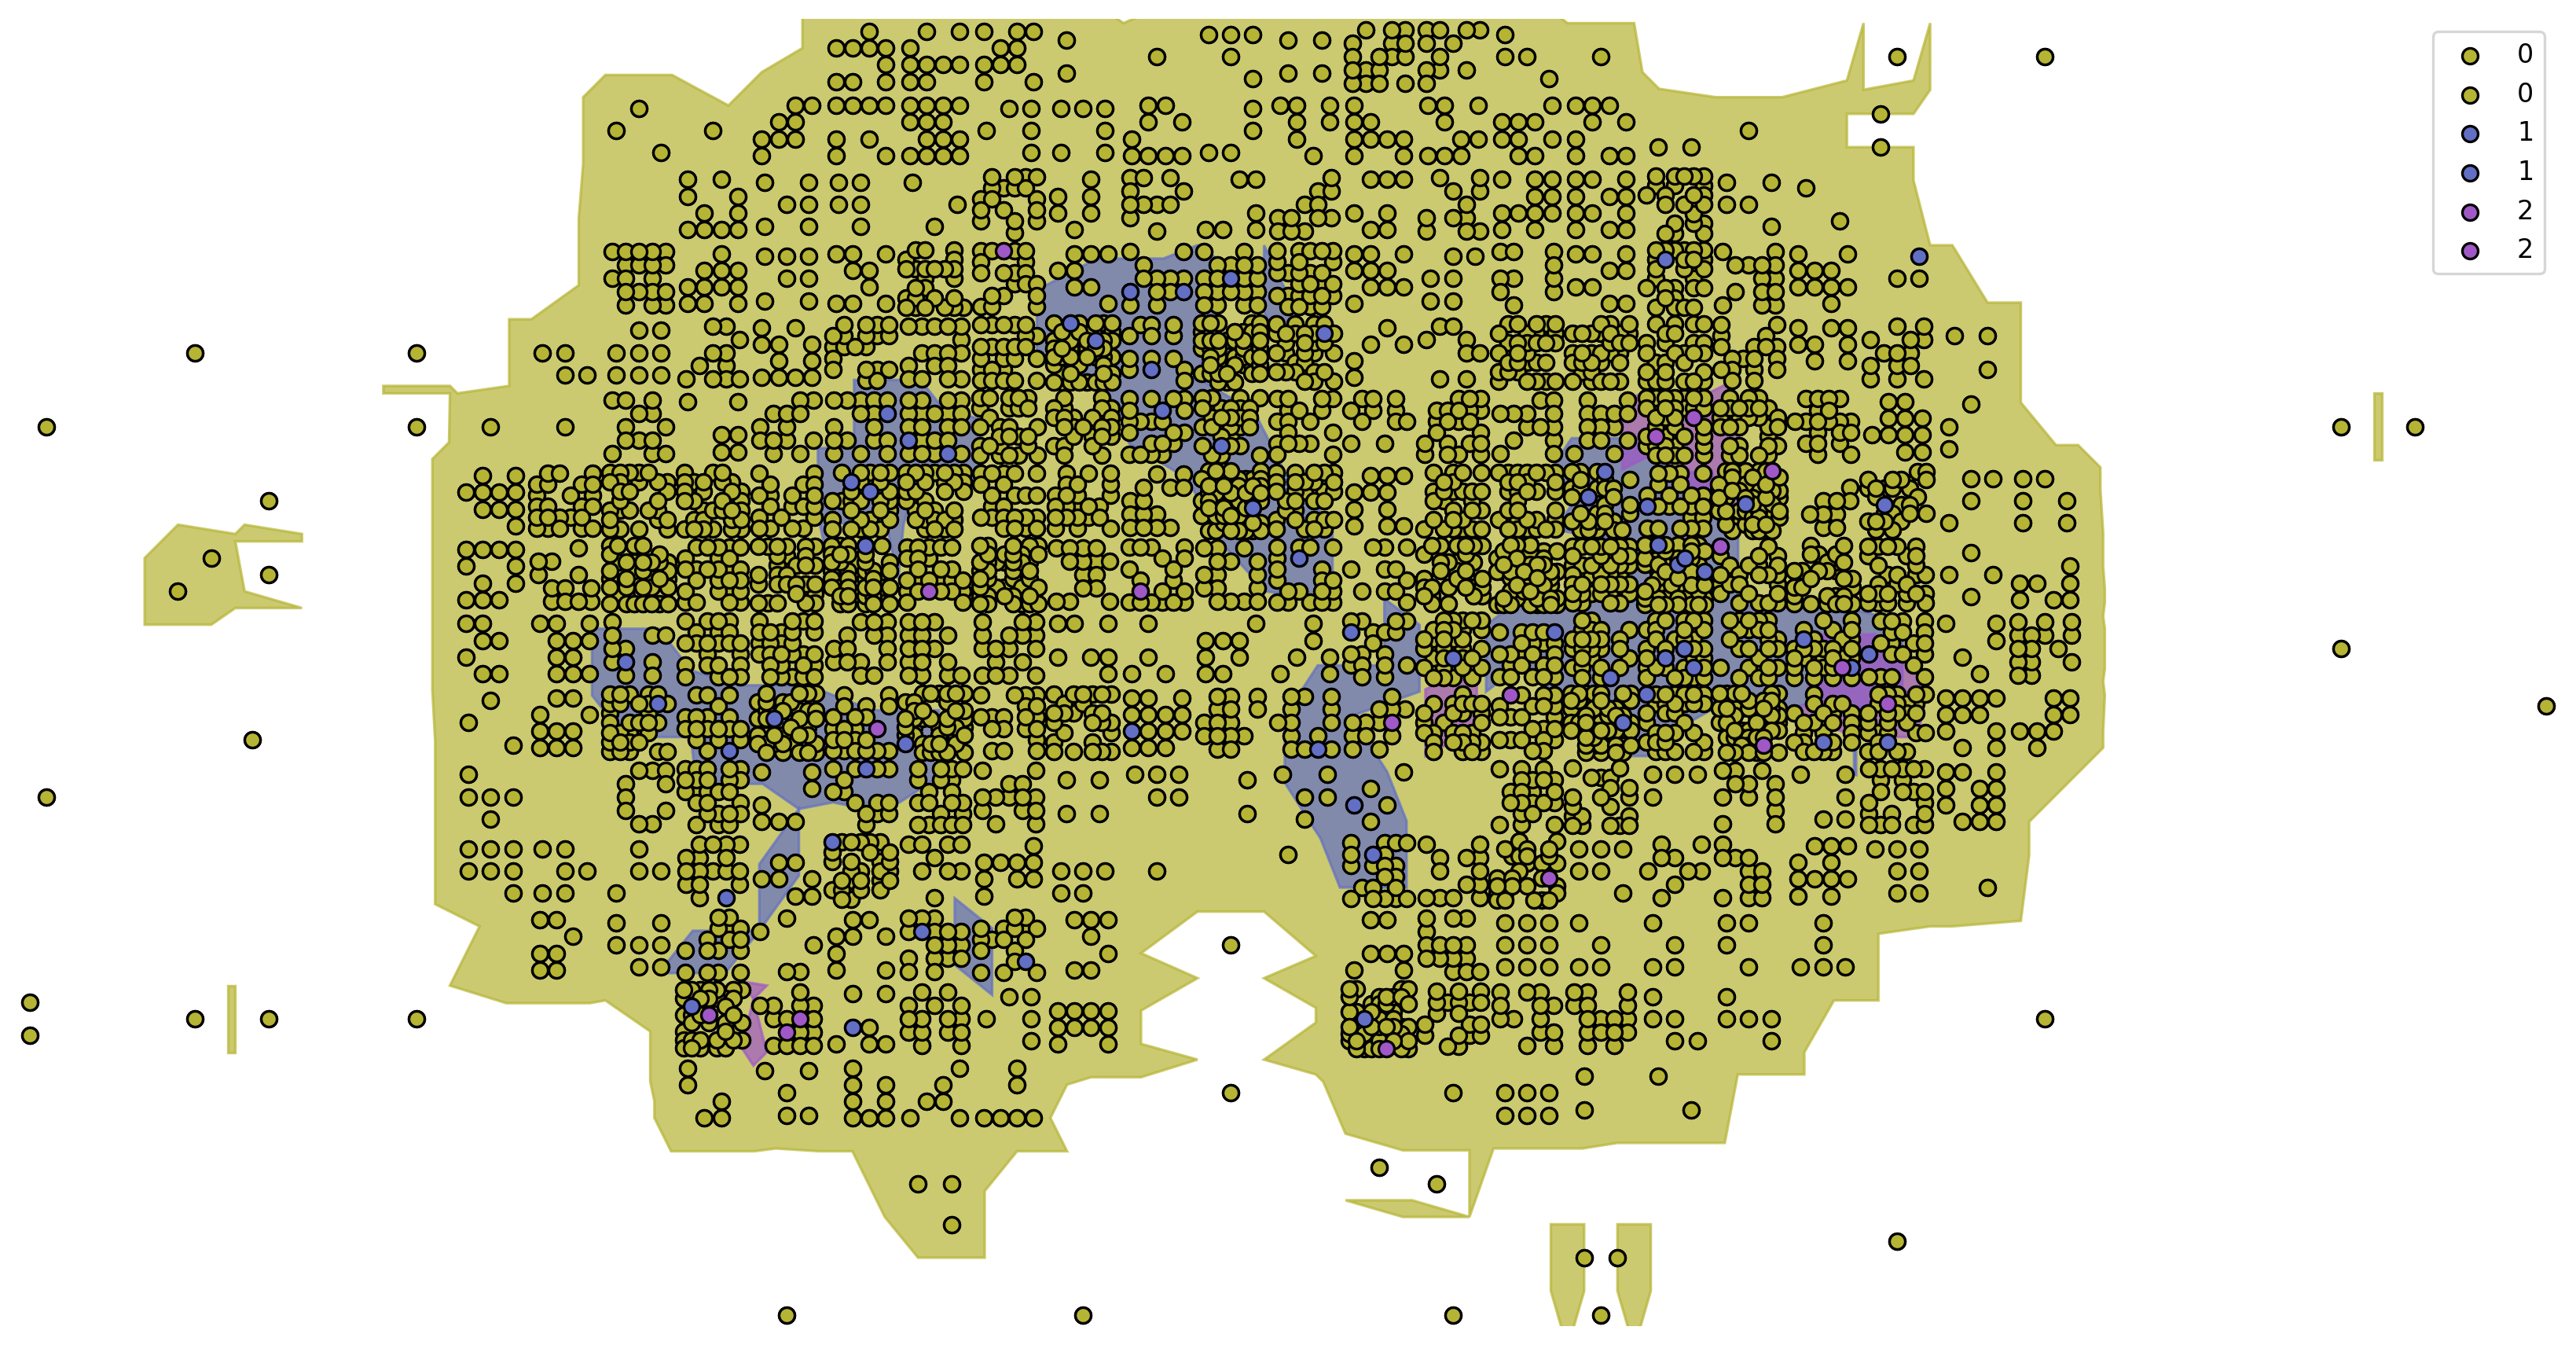

In [79]:
fig, ax = plt.subplots(figsize=(20, 9), dpi=120)
data = xy.join(adata.obs)

scatter = sns.scatterplot(
    data=xy.join(adata.obs),
    # data = test_adata.obs,
    x='x', y='y',
    # hue='banksy_celltypes', 
    color='grey',
    s=30,
    alpha=0.3,
    edgecolor='none',
    # palette=color_dict,
    ax=ax,
)

zone_alpha = 0.7
area_thresh = 10

for cluster, alpha_shape in alphashapes.items():
    try:
        for geom in alpha_shape.geoms:
            if geom.area > area_thresh:
                ax.fill(
                    geom.exterior.xy[0], 
                    geom.exterior.xy[1], 
                    color=color_dict[str(cluster)], alpha=zone_alpha)
    except:
        geom = alpha_shape
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict[str(cluster)], alpha=zone_alpha
        )

for ct in chart.adata.obs['leiden'].unique():
    ax.scatter(
        chart.adata[chart.adata.obs['leiden'] == ct].obsm['spatial'][:, 0],
        chart.adata[chart.adata.obs['leiden'] == ct].obsm['spatial'][:, 1],
        c=color_dict[ct], alpha=1, edgecolor='black', linewidth=1,
        label=ct
    )


for ct in chart.adata.obs['transition'].unique():
    ax.scatter(
        chart.adata[chart.adata.obs['transition'] == ct].obsm['spatial'][:, 0],
        chart.adata[chart.adata.obs['transition'] == ct].obsm['spatial'][:, 1],
        c=color_dict[ct], alpha=1, edgecolor='black', linewidth=1, label=ct
    )

handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1]))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)
ax.legend(sorted_handles, sorted_labels)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_aspect('equal')
ax.set_xlim(data.x.min() - 10, data.x.max() + 10)
ax.set_ylim(data.y.min() - 10, data.y.max() + 10)

plt.savefig(f'figures/mouse_kidney_14_MifKO_postKO.svg', format='svg')

In [80]:
df = chart.adata.obs[['leiden', 'transition']].copy()
df['leiden'] = pd.Categorical(df['leiden'], ordered=True, categories=sorted(df['leiden'].unique(), key=lambda x: int(x)))
counts = df.groupby(['leiden', 'transition']).size().unstack(fill_value=0)

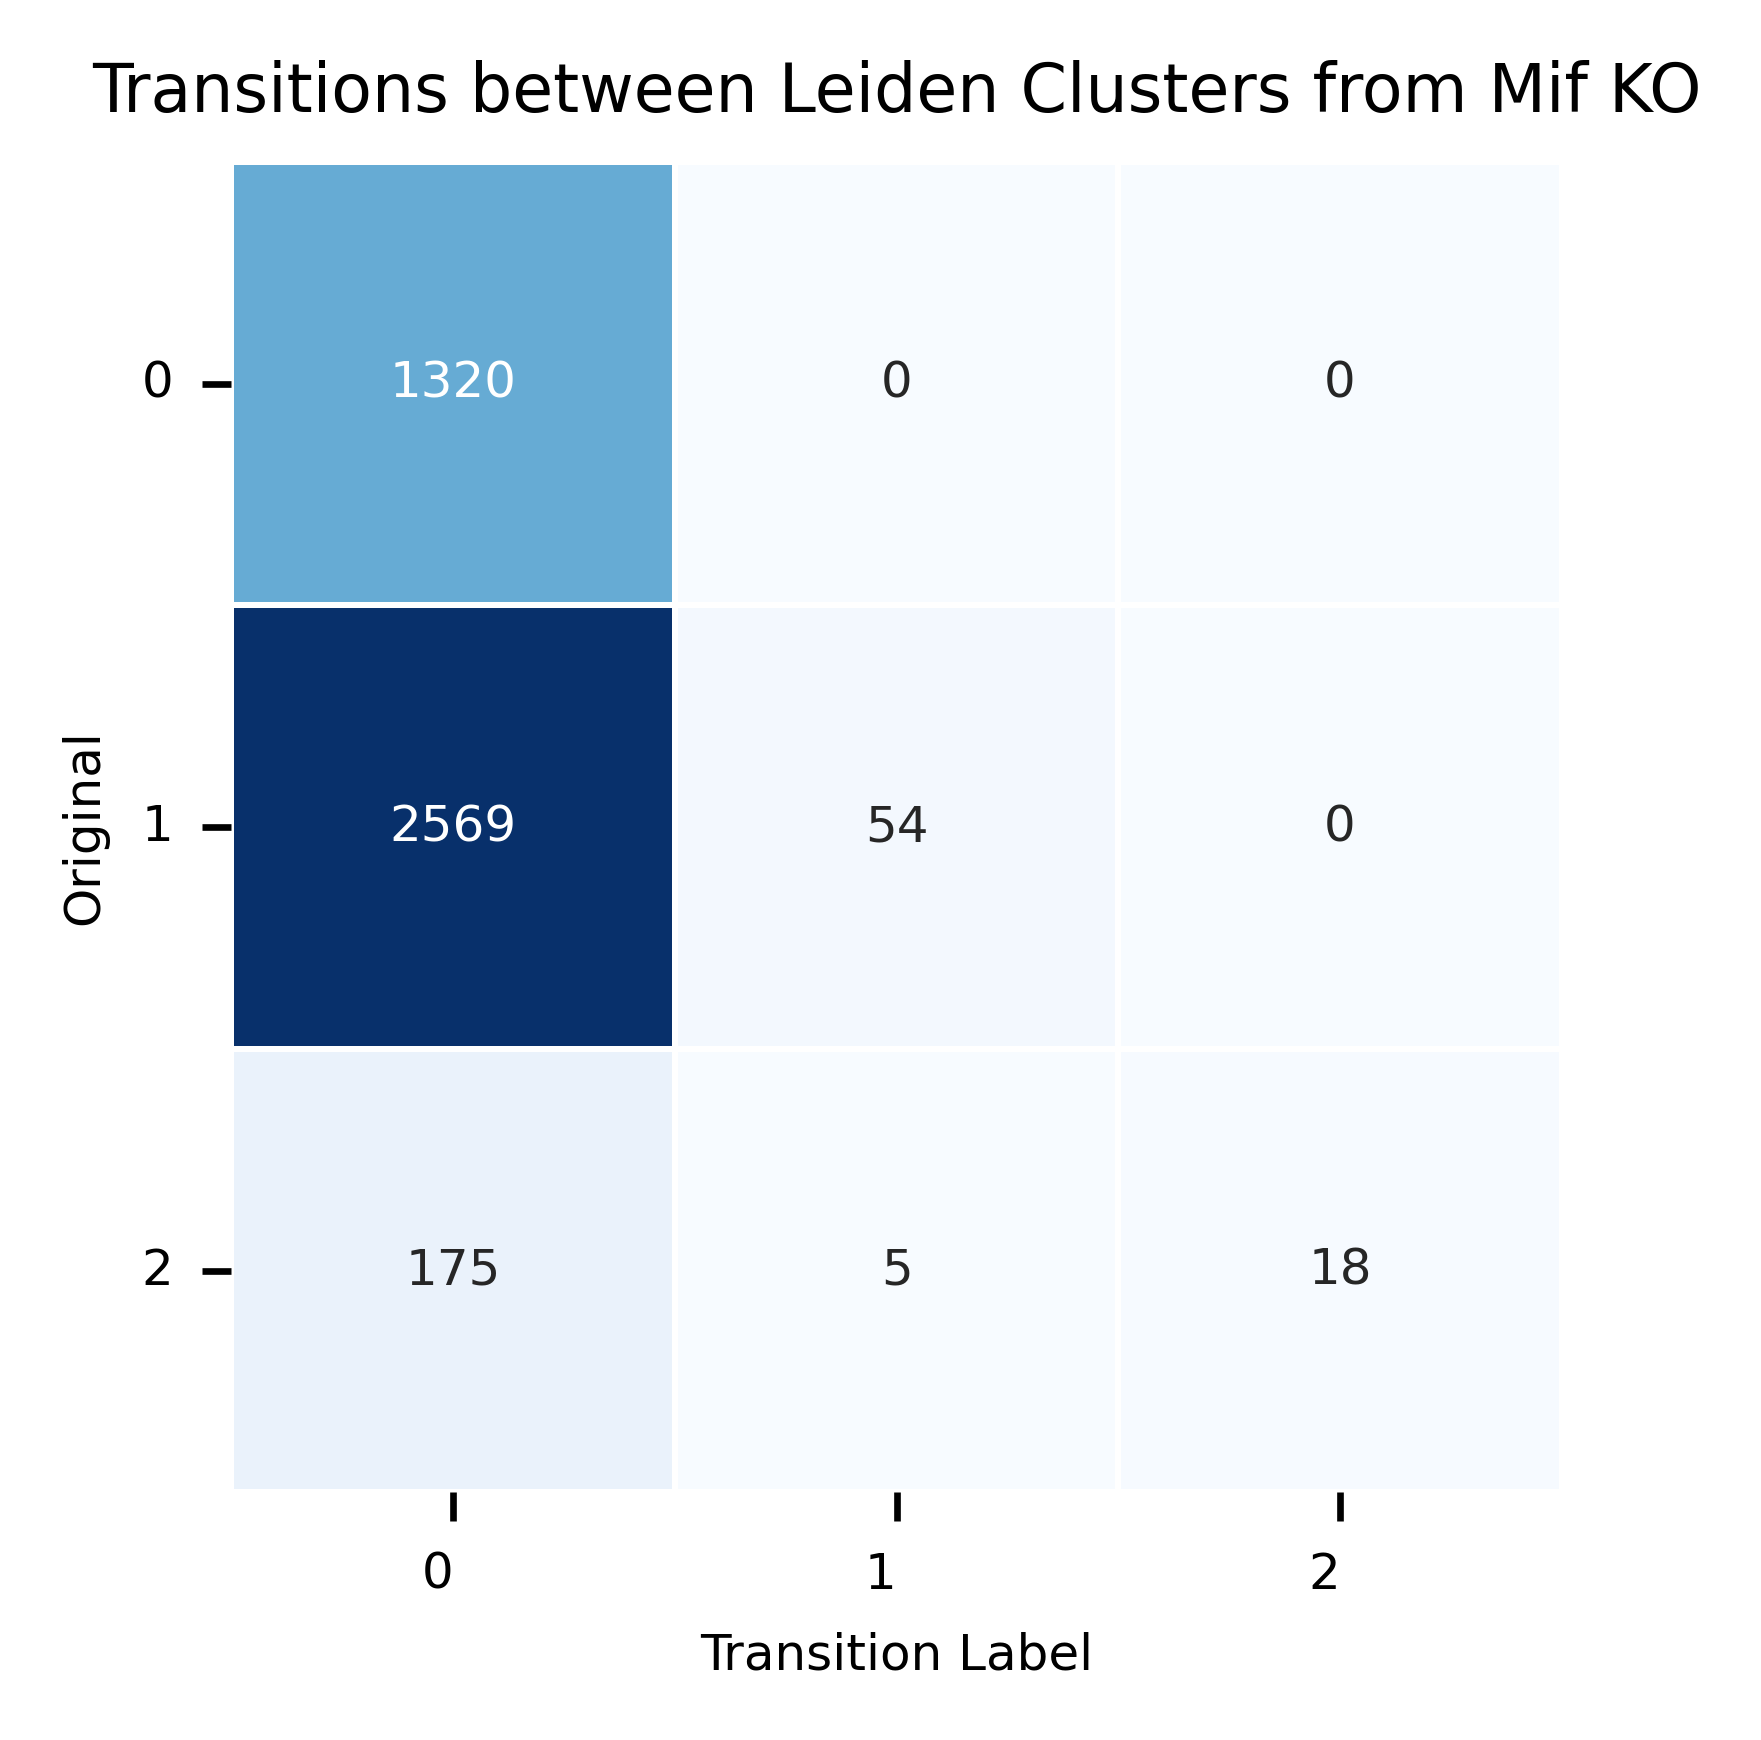

In [81]:
plt.figure(figsize=(3,3), dpi=300)

sns.heatmap(
    counts,
    annot=True,
    fmt='d',  # integer formatting
    cmap='Blues',  # nice clean color palette
    linewidths=0.5,
    linecolor='white',
    cbar=False,
    square=True,
    annot_kws={"size": 6}
)

plt.title("Transitions between Leiden Clusters from Mif KO", fontsize=8)
plt.xlabel("Transition Label", fontsize=6)
plt.ylabel("Original", fontsize=6)
plt.xticks(rotation=0, ha='right', fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.savefig('figures/mouse_kidney_14_MifKO_transitions.svg', format='svg')
plt.tight_layout()
plt.show()

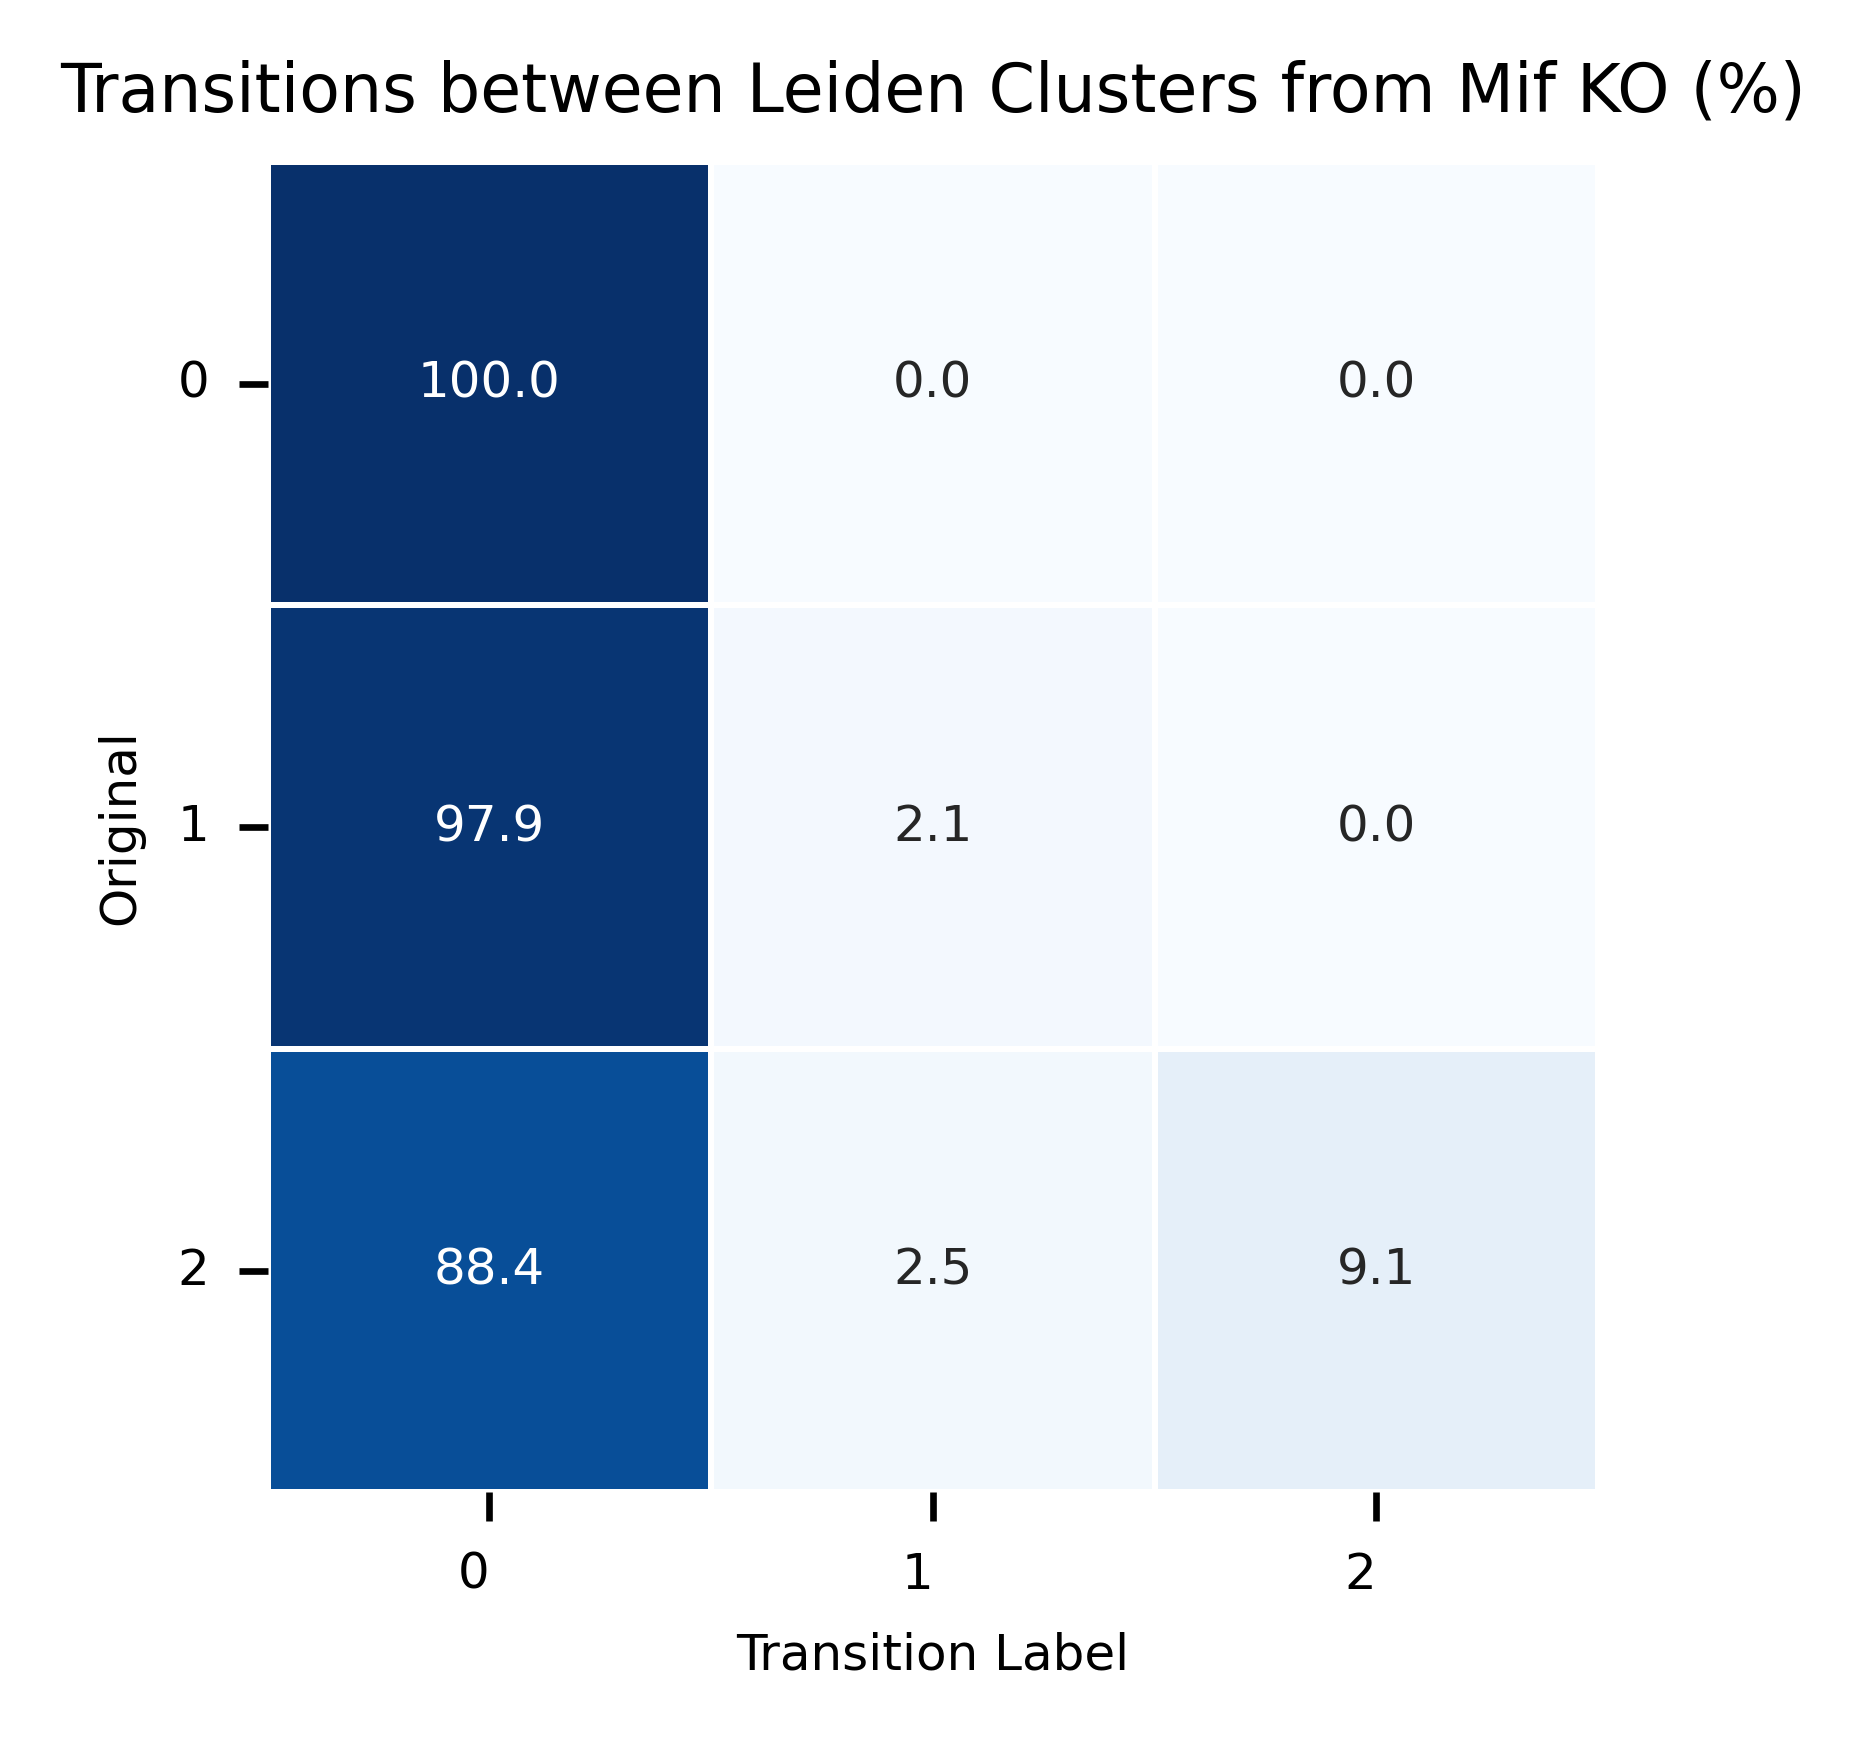

In [82]:
plt.figure(figsize=(3,3), dpi=300)

# Normalize counts by row (cluster)
counts_pct = counts.div(counts.sum(axis=1), axis=0) * 100

sns.heatmap(
    counts_pct,
    annot=True,
    fmt='.1f',  # float formatting with 1 decimal place
    cmap='Blues',  # nice clean color palette
    linewidths=0.5,
    linecolor='white',
    cbar=False,
    square=True,
    annot_kws={"size": 6}
)

plt.title("Transitions between Leiden Clusters from Mif KO (%)", fontsize=8)
plt.xlabel("Transition Label", fontsize=6)
plt.ylabel("Original", fontsize=6)
plt.xticks(rotation=0, ha='right', fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.savefig('figures/mouse_kidney_14_MifKO_transitions_pct.svg', format='svg')
plt.tight_layout()
plt.show()

In [ ]:
stop

### Banksy stuff

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 4))

def plot_spatial_cells(cts, ax):
    for ct in cts:
        mask = adata_.obs['banksy_cluster'] == ct
        ax.scatter(
            adata_.obsm['spatial'][mask, 0], adata_.obsm['spatial'][mask, 1],
            c=color_dict[ct], s=10, alpha=0.5, label=ct,
            edgecolor='black', linewidth=0.1
        )
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., markerscale=1.5)
    ax.set_axis_off()
    ax.set_aspect('equal')   

plot_spatial_cells([13, 7], ax=ax1)
plot_spatial_cells([0, 4], ax=ax2)
plot_spatial_cells([3, 2], ax=ax3)
plot_spatial_cells([1], ax=ax4)

plt.tight_layout()
plt.show()


In [ ]:
chart_.adata.layers['Mif'] = chart_.adata.layers['Mif_4n_0x']

In [ ]:
# corr = chart_.get_corr(kotarget)

# source_ct = 'Mac_0'
# transition_df = chart_.compute_transitions(corr, source_ct=source_ct, annot='ct3')

# chart.assess_transitions(
#     transition_df, 
#     base_celltypes=adata_.obs.ct3, 
#     source_ct=source_ct,
#     annot='ct3'
# )

In [ ]:
# thresh = 0.00045 # need to cross this to leave base cell phenotype
# allowed_fates = [
#     'Mac_3_TGFB3+',
#     'Mac_0',
#     'Mac_2'
# ]

# transitions = chart_.get_cellfate(
#     transition_df, allowed_fates, thresh, annot='ct3')

In [ ]:
# color_dict_ = {ct: color_dict[ct] for ct in ['Mac_0', 'Mac_2', 'Mac_3_TGFB3+']}

# cell_types_adata = adata.obs.ct3.unique()
# cell_types_ref_adata = ref_adata.obs.ct3.unique()

# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# for cell_type in cell_types_adata:
#     subset = adata[adata.obs.ct3 == cell_type]
#     axes[0].scatter(
#         subset.obsm['spatial'][:, 0], subset.obsm['spatial'][:, 1],
#         c=color_dict_.get(cell_type, 'gray'), s=10, alpha=0.5, label=cell_type
#     )

# axes[0].set_title('mouse_kidney_14')
# axes[0].axis('off')

# # Plot for ref_adata
# for cell_type in cell_types_ref_adata:
#     subset = ref_adata[ref_adata.obs.ct3 == cell_type]
#     axes[1].scatter(
#         subset.obsm['spatial'][:, 0], subset.obsm['spatial'][:, 1],
#         c=color_dict_.get(cell_type, 'gray'), s=10, alpha=0.5, label=cell_type
#     )

# axes[1].set_title('mouse_kidney_13')
# axes[1].axis('off')

# handles, labels = axes[0].get_legend_handles_labels()
# handles2, labels2 = axes[1].get_legend_handles_labels()

# handles.extend(handles2)
# labels.extend(labels2)

# fig.legend(handles, labels, title="Cell Types", loc='center', ncol=6, bbox_to_anchor=(0.5, -0.3), frameon=False)
# plt.tight_layout()


In [ ]:
# from spaceoracle.plotting.shift import estimate_transition_probabilities

# embedding = adata_.obsm['X_umap']
# n_neighbors = 200
# delta_X = adata_.layers[kotarget] - adata_.layers['imputed_count']
# P = estimate_transition_probabilities(
#     adata_, delta_X, embedding, n_neighbors=n_neighbors, n_jobs=1)

# delta_X_null = adata_.layers['imputed_count'] - adata_.layers['imputed_count']
# P_null = estimate_transition_probabilities(
#     adata_, delta_X_null, embedding, n_neighbors=n_neighbors, n_jobs=1)

In [ ]:
# projection_params = {
#     'basis': 'spatial',
#     'color': 'ct3', 
#     'legend_loc': 'right',
#     'recompute': True,
#     'stream': False,
#     'scale': 0.5,
#     'alpha': 0.6,
#     'size': 50,
#     'show': False,
#     'linewidth': 0.1,
#     'palette': color_dict,
#     'min_mass': 50,
#     'smooth': 1.5,
#     'edgecolor': 'none',
#     'arrow_color':'black',
#     'n_neighbors': 500
# }

# # %%capture
# chart_.get_grids(P, projection_params)

### Genome screen

In [ ]:
renata.genome_screen(
    save_to='/ix/djishnu/shared/djishnu_kor11/genome_screens/mouse_kidney_14',
    n_propagation=4
)

In [ ]:
for ct in ref_adata.obs['ct3'].unique():
    if ct not in chart.color_dict.keys():
        chart.color_dict[ct] = '#808080'
        
chart = Cartography(ref_adata, color_dict)

In [ ]:
sample = 'mouse_kidney_13'

kotarget = 'Mif'
ax = chart.plot_umap_quiver(
    perturb_target=kotarget,
    grid_scale=1,
    vector_scale=0.5,
    figsize=(5, 5), 
    hue='ct3',
    alpha=0.5,
    scatter_size=10,
    betadata_path=f'/ix/djishnu/shared/djishnu_kor11/genome_screens/{sample}',
    legend_on_loc=False,
)
ax.legend(
    bbox_to_anchor=(0.5, 0.0),
    loc='upper center', ncol=3, 
    frameon=False, markerscale=1.5,
    fontsize=6
)

plt.title(f'{sample} {kotarget} KO')
plt.show()

In [ ]:
adata_ref_ = ref_adata[ref_adata.obs.ct3.isin(['Mac_0', 'Mac_2', 'Mac_3_TGFB3+'])].copy()
adata_ref_.obs.ct3 = adata_ref_.obs.ct3.cat.remove_unused_categories()

chart_ref_ = Cartography(adata_ref_, color_dict)

In [ ]:
kotarget = 'Mif'
ax = chart_ref_.plot_umap_quiver(
    perturb_target=kotarget,
    grid_scale=1,
    vector_scale=0.5,
    figsize=(5, 5), 
    hue='ct3',
    alpha=0.5,
    scatter_size=10,
    betadata_path=f'/ix/djishnu/shared/djishnu_kor11/genome_screens/{sample}',
    legend_on_loc=False,
)
ax.legend(
    bbox_to_anchor=(0.5, 0.0),
    loc='upper center', ncol=3, 
    frameon=False, markerscale=1.5,
    fontsize=6
)

plt.title(f'{kotarget} KO')
plt.show()